In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# load the data
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [2]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [3]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [5]:
# merge the data
df = observations.merge(species, how='outer')

print(df.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


In [6]:
print(len(observations), len(species), len(df))

23296 5824 25632


In [7]:
print(df.describe())

       observations
count  25632.000000
mean     142.214693
std       69.912475
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


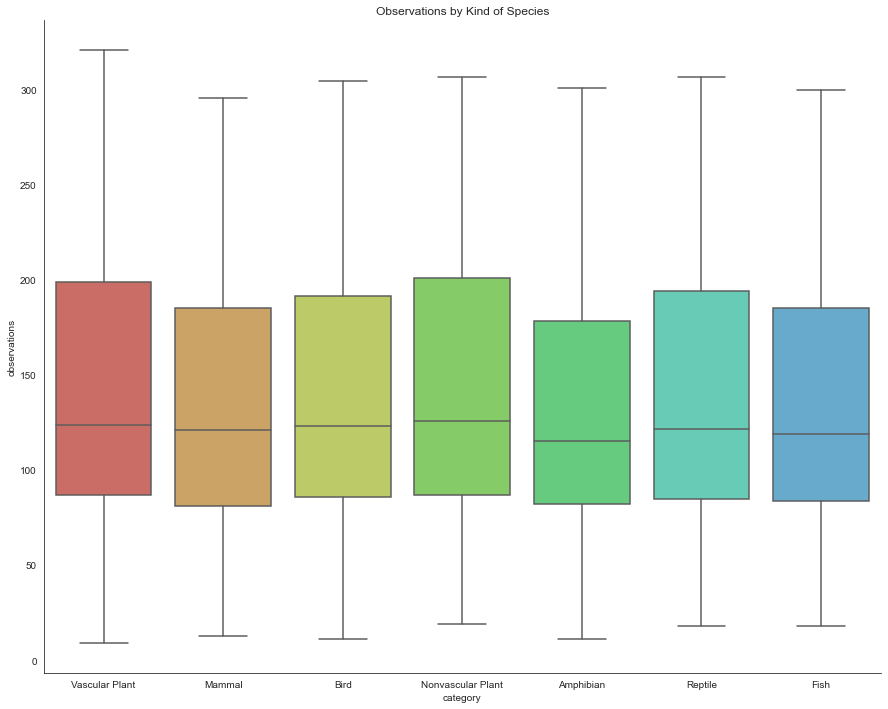

In [125]:
plt.figure(figsize = (15, 12))
sns.set_style('white')
sns.set_palette('hls', 11)
plt.title('Observations by Kind of Species')

sns.boxplot(data = df, x = 'category', y = 'observations')
sns.despine()
plt.show()

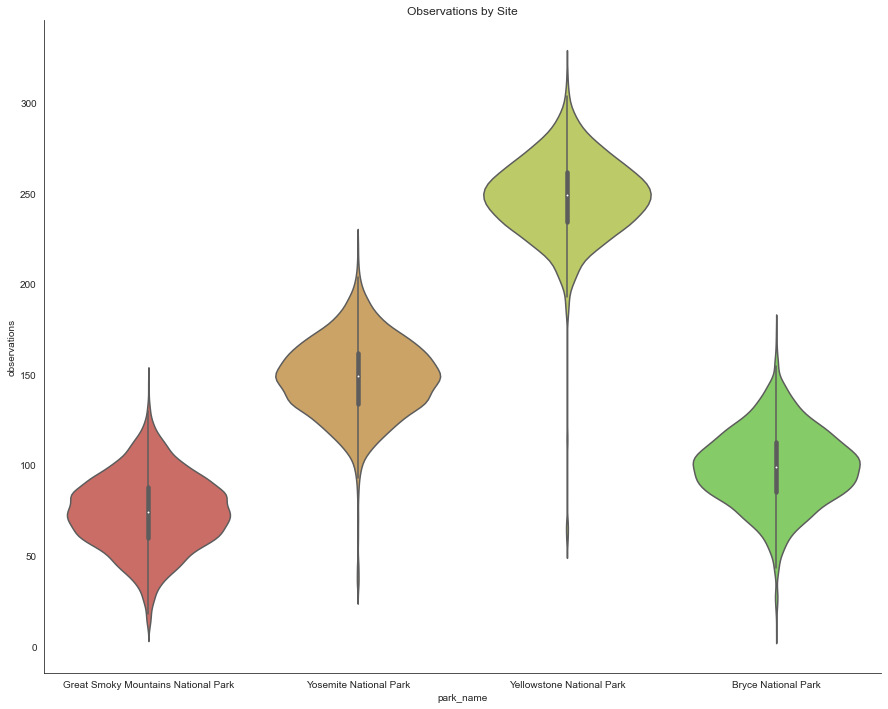

In [124]:
plt.figure(figsize = (15, 12))
plt.title('Observations by Site')
sns.violinplot(data = df, x = 'park_name', y = 'observations')
sns.despine()


In [58]:
def new_column(row):
    if row['category'] == 'Vascular Plant':
        return 'plant'
    elif row['category'] == 'Nonvascular Plant':
        return 'plant'
    else:
        return 'animal'


df['kind'] = df.apply(new_column, axis = 1)


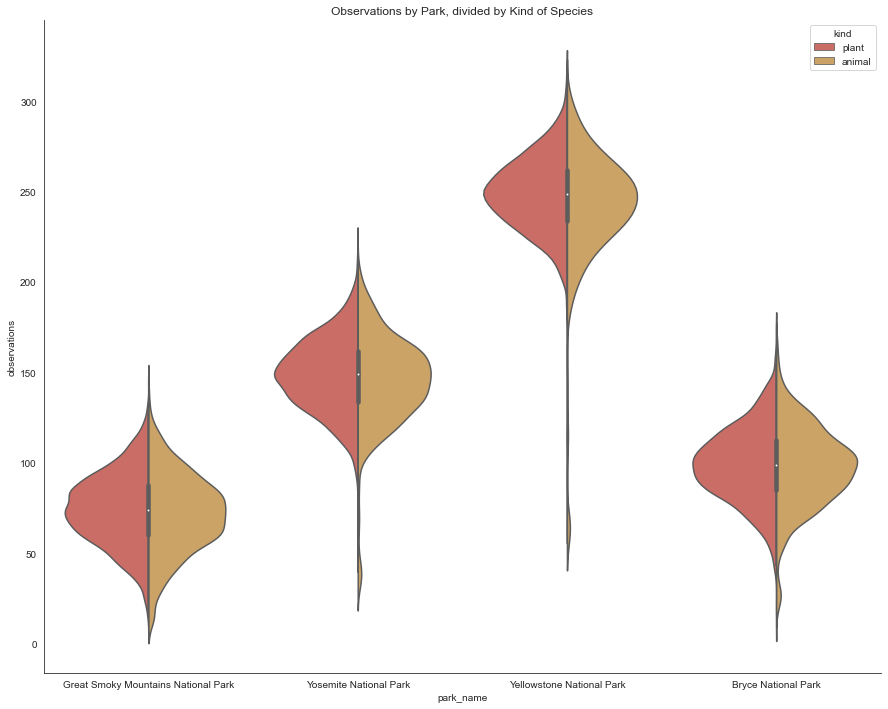

In [123]:
plt.figure(figsize = (15, 12))

plt.title('Observations by Site, divided by Kind of Species')

sns.violinplot(data = df, x = 'park_name', y = 'observations', hue = 'kind', split=True)
sns.despine()

#print(df.head(50))

In [56]:
print(df.columns)

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status', 'kind'],
      dtype='object')


In [57]:
print(df.conservation_status.unique())

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


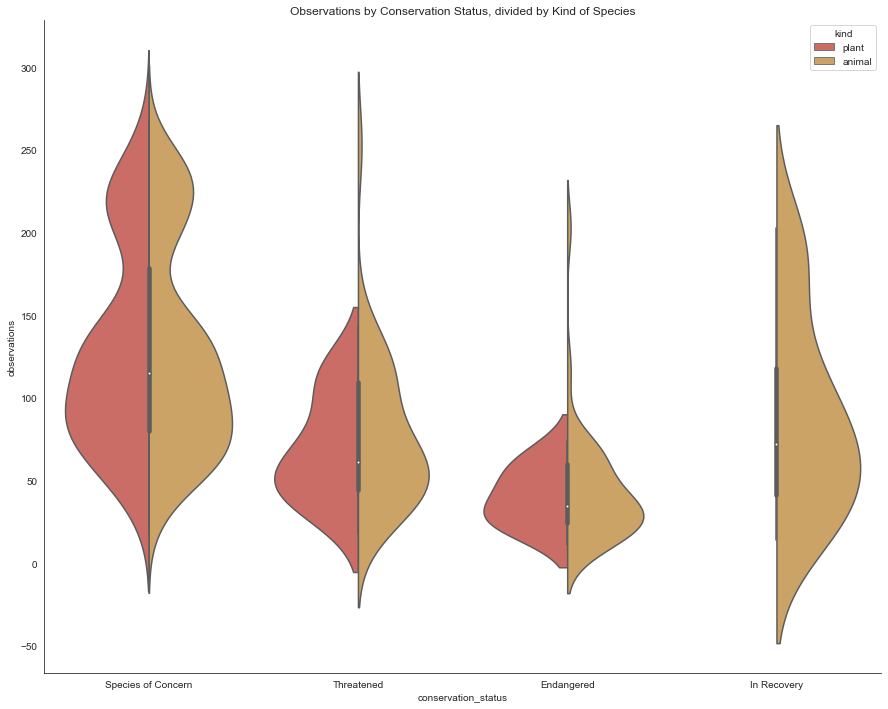

In [122]:
plt.figure(figsize = (15, 12))
plt.title('Observations by Conservation Status, divided by Kind of Species')

sns.violinplot(data = df, x = 'conservation_status', y = 'observations', hue = 'kind', split=True)
sns.despine()

Text(0.5, 1.0, 'Conservation Status of Species by Category found')

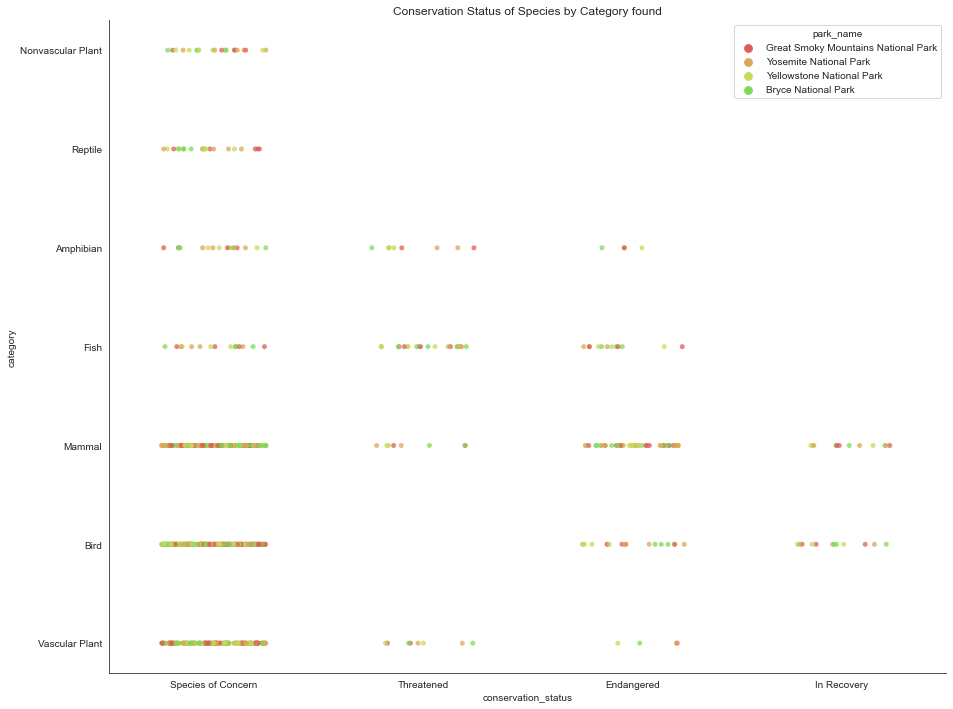

In [142]:
plt.figure(figsize = (15, 12))

#sns.stripplot(data = df, x = 'conservation_status', y = 'category', hue = 'park_name', jitter=0.25, palette='magma_r', alpha=.75)
sns.set_palette('hls', 11)
sns.stripplot(data = df, x = 'conservation_status', y = 'category', hue = 'park_name', jitter=0.25, alpha=.75)
sns.despine()
plt.title('Conservation Status of Species by Category found')
#print(df.head(50))

([<matplotlib.patches.Wedge at 0x7fa21972a640>,
 [Text(0.9195301897332143, 0.6037087295784276, 'animals'),
  Text(-0.9195301614715681, -0.6037087726247419, 'plants')],
 [Text(0.5015619216726623, 0.3292956706791423, '18.5%'),
  Text(-0.5015619062572189, -0.32929569415895005, '81.5%')])

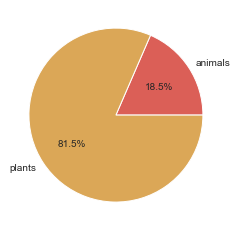

In [144]:
plt.pie([len(df[df.kind == 'animal']), len(df[df.kind == 'plant'])], autopct = '%0.1f%%', labels=['animals', 'plants'])

In [119]:
endangered = df[df.conservation_status == 'Endangered']

print(endangered.head(), len(endangered))

        scientific_name                            park_name  observations  \
1400  Picoides borealis               Yosemite National Park            43   
1401  Picoides borealis  Great Smoky Mountains National Park            15   
1402  Picoides borealis            Yellowstone National Park            64   
1403  Picoides borealis                  Bryce National Park            24   
2476       Rana sierrae               Yosemite National Park            42   

       category                      common_names conservation_status    kind  
1400       Bird           Red-Cockaded Woodpecker          Endangered  animal  
1401       Bird           Red-Cockaded Woodpecker          Endangered  animal  
1402       Bird           Red-Cockaded Woodpecker          Endangered  animal  
1403       Bird           Red-Cockaded Woodpecker          Endangered  animal  
2476  Amphibian  Sierra Nevada Yellow-Legged Frog          Endangered  animal   80


([<matplotlib.patches.Wedge at 0x7fa236da7ee0>,
 [Text(-1.086457168210212, 0.17207795223283892, 'animals'),
  Text(1.0864571621685486, -0.17207799037838706, 'plants')],
 [Text(-0.5926130008419338, 0.09386070121791212, '95.0%'),
  Text(0.592612997546481, -0.09386072202457475, '5.0%')])

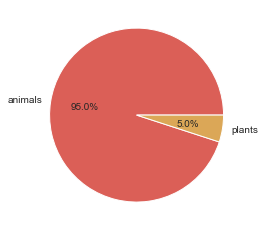

In [146]:
plt.pie([len(endangered[endangered.kind == 'animal']), len(endangered[endangered.kind == 'plant'])], autopct = '%0.1f%%', labels=['animals', 'plants'])